In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")
from IPython.display import HTML,display

warnings.filterwarnings("ignore")

In [2]:
path=(r"C:\Users\raghu\Desktop\Internship\PART 2\LSTM")
dir_list=os.listdir(path)
print(dir_list)

['.ipynb_checkpoints', 'city_day.csv', 'city_hour.csv', 'city_week.xlsx', 'LSTM hour.ipynb', 'stations.csv', 'station_day.csv', 'station_hour.csv']


In [3]:
df= pd.read_csv(r"C:\Users\raghu\Desktop\Internship\PART 2\LSTM\city_day.csv",parse_dates=True)


In [5]:
df['Date'] = pd.to_datetime(df['Date'])

In [6]:
df=df[['City','Date','AQI']]

In [7]:
delhi = df[df['City'] == 'Delhi']
delhi.drop(['City'],axis=1,inplace = True)
delhi.set_index('Date', inplace = True)

In [8]:
delhi

,AQI
Date,
2015-01-01,472.0
2015-02-01,454.0
2015-03-01,143.0
2015-04-01,319.0
2015-05-01,325.0
...,...
2020-06-27,112.0
2020-06-28,196.0
2020-06-29,233.0


In [9]:
delhi['AQI'].fillna(method = 'bfill',inplace = True)


In [10]:
delhi=delhi.astype('float64')
delhi=delhi.resample(rule='MS').mean()

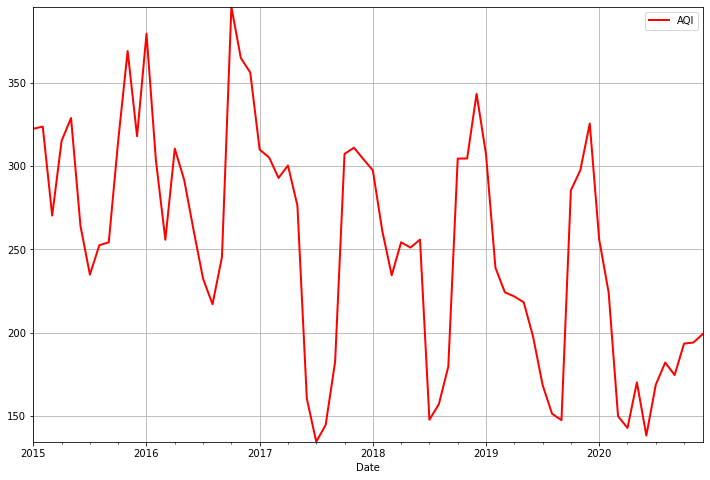

In [11]:
ax=delhi[['AQI']].plot(figsize=(12,8),grid=True,lw=2,color='Red')
ax.autoscale(enable=True, axis='both', tight=True)

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error

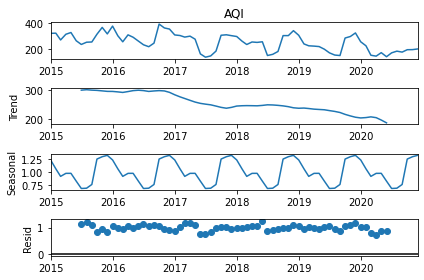

In [13]:
delhi_AQI=delhi['AQI']
result=seasonal_decompose(delhi_AQI,model='multiplicative')
result.plot();

In [14]:
#Hourly data splitted into testing and training
train=delhi[:48]
test=delhi[48:61]

In [15]:
type(train)

pandas.core.frame.DataFrame

In [16]:
print("Shape of train data:" + str(train.shape))
print("Shape of test data:" + str(test.shape))

Shape of train data:(48, 1)
Shape of test data:(13, 1)


In [17]:
train_arr = train
test_arr = test

In [18]:
train_arr

,AQI
Date,
2015-01-01,322.290323
2015-02-01,323.571429
2015-03-01,270.258065
2015-04-01,315.066667
2015-05-01,328.741935
2015-06-01,264.000000
2015-07-01,234.838710
2015-08-01,252.483871
2015-09-01,254.233333


In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(train_arr)

MinMaxScaler()

In [20]:
scaled_train = scaler.transform(train_arr)
scaled_test = scaler.transform(test_arr)

In [21]:
from keras.preprocessing.sequence import TimeseriesGenerator
n_input = 12
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [22]:
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.71983665 0.72475118 0.52023264 0.69212556 0.74458607 0.49622571
 0.38435837 0.45204801 0.45875923 0.69248855 0.89851091 0.70263581]
Predict this y: 
 [[0.93849771]]


In [23]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.optimizers import Adam

In [24]:
model = Sequential(name = 'LSTM-Model')
model.add(LSTM(32, activation='relu', return_sequences = True, input_shape=(n_input, n_features),name = "LSTM_1"))
#model.add(LSTM(100, activation='relu', return_sequences = True,name = "LSTM_2"))
#model.add(Dropout(0.2))
model.add(LSTM(32, activation='relu',name = "LSTM_2"))
#model.add(Dropout(0.2))
#model.add(Dense(8))
model.add(Dense(1,name = "DENSE_1"))
model.compile(optimizer= 'adam',  loss='mse')

model.summary()

Model: "LSTM-Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 LSTM_1 (LSTM)               (None, 12, 32)            4352      
                                                                 
 LSTM_2 (LSTM)               (None, 32)                8320      
                                                                 
 DENSE_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 12,705
Trainable params: 12,705
Non-trainable params: 0
_________________________________________________________________


In [25]:
#Plotting the layer structure
from keras.utils import plot_model
plot_model(model,show_shapes=True,show_layer_names=True,rankdir="TB",dpi=96)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [26]:
model.fit_generator(generator,epochs=200)

Epoch 1/200
36/36 [==============================] - 7s 22ms/step - loss: 0.1917
Epoch 2/200
36/36 [==============================] - 1s 21ms/step - loss: 0.0801
Epoch 3/200
36/36 [==============================] - 1s 20ms/step - loss: 0.0726
Epoch 4/200
36/36 [==============================] - 1s 20ms/step - loss: 0.0723
Epoch 5/200
36/36 [==============================] - 1s 20ms/step - loss: 0.0686
Epoch 6/200
36/36 [==============================] - 1s 20ms/step - loss: 0.0807
Epoch 7/200
36/36 [==============================] - 1s 20ms/step - loss: 0.0727
Epoch 8/200
36/36 [==============================] - 1s 20ms/step - loss: 0.0693
Epoch 9/200
36/36 [==============================] - 1s 20ms/step - loss: 0.0703
Epoch 10/200
36/36 [==============================] - 1s 20ms/step - loss: 0.0759
Epoch 11/200
36/36 [==============================] - 1s 20ms/step - loss: 0.0695
Epoch 12/200
36/36 [==============================] - 1s 20ms/step - loss: 0.0711
Epoch 13/200
36/36 [=====

36/36 [==============================] - 0s 7ms/step - loss: 0.0138
Epoch 102/200
36/36 [==============================] - 0s 7ms/step - loss: 0.0139
Epoch 103/200
36/36 [==============================] - 0s 7ms/step - loss: 0.0171
Epoch 104/200
36/36 [==============================] - 0s 7ms/step - loss: 0.0138
Epoch 105/200
36/36 [==============================] - 0s 8ms/step - loss: 0.0136
Epoch 106/200
36/36 [==============================] - 0s 7ms/step - loss: 0.0129
Epoch 107/200
36/36 [==============================] - 0s 7ms/step - loss: 0.0136
Epoch 108/200
36/36 [==============================] - 0s 7ms/step - loss: 0.0155
Epoch 109/200
36/36 [==============================] - 0s 7ms/step - loss: 0.0132
Epoch 110/200
36/36 [==============================] - 0s 7ms/step - loss: 0.0127
Epoch 111/200
36/36 [==============================] - 0s 8ms/step - loss: 0.0130
Epoch 112/200
36/36 [==============================] - 0s 7ms/step - loss: 0.0120
Epoch 113/200
36/36 [=========

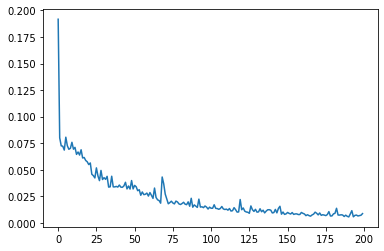

In [27]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [28]:
#Predicting using our model on the testing dataset
test_predictions = []

first_batch = scaled_train[-n_input:]
current_batch = first_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
      
    current_pred = model.predict(current_batch)[0]
    test_predictions.append(current_pred) 
    
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 23ms/step


In [29]:
test_predictions = scaler.inverse_transform(test_predictions)

In [30]:
print(test_predictions.shape)
print(test_arr.shape)

(13, 1)
(13, 1)


In [31]:
test_arr['Predictions'] = test_predictions

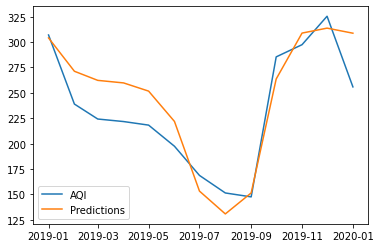

In [32]:
plt.plot(test_arr['AQI'],label = 'AQI')
plt.plot(test_arr['Predictions'],label = 'Predictions')

plt.legend()

In [33]:
RMSE_test=np.sqrt(mean_squared_error(test_arr['AQI'],test_arr['Predictions']))
print('RMSE on the testing dataset = ',RMSE_test)
print('India_AQI=',test_arr['AQI'].mean())

RMSE on the testing dataset =  27.556406794677457
India_AQI= 233.8256155754915


In [34]:
#Predicting using our model on the training dataset
train_predictions = []

first_eval_batch = scaled_train[:n_input]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(train-n_input)):
      
    current_pred = model.predict(current_batch)[0]
    train_predictions.append(current_pred) 
    
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 25ms/step


In [35]:
train_predictions = scaler.inverse_transform(train_predictions)

In [36]:
print(train_predictions.shape)
print(train_arr.shape)

(48, 1)
(48, 1)


In [37]:
train_arr['Predictions'] = train_predictions

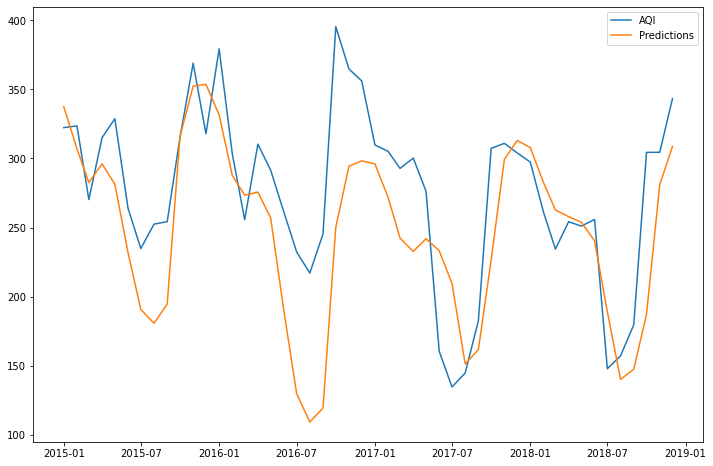

In [38]:
plt.figure(figsize=(12,8))
plt.plot(train_arr['AQI'],label = 'AQI')
plt.plot(train_arr['Predictions'],label = 'Predictions')
plt.legend()

In [39]:
RMSE_train =np.sqrt(mean_squared_error(train_arr['AQI'],train_arr['Predictions']))
print('RMSE on the training dataset = ',RMSE_train)
print('India_AQI=',train_arr['AQI'].mean())

RMSE on the training dataset =  54.38300140914808
India_AQI= 274.9948553397072


In [40]:
delhi_arr= delhi
scaled_delhi = scaler.transform(delhi_arr)

In [41]:
#Making the future predictions using our model
fut_predictions = []

first_eval_batch = scaled_delhi[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(12):
    
    current_pred = model.predict(current_batch)[0]
    
    
    fut_predictions.append(current_pred) 
    
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 28ms/step


In [42]:
fut_predictions = scaler.inverse_transform(fut_predictions)

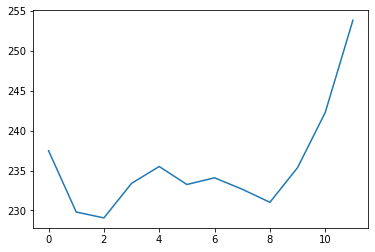

In [43]:

plt.plot(fut_predictions)

In [44]:
complete_pred = np.concatenate((delhi_arr,fut_predictions))

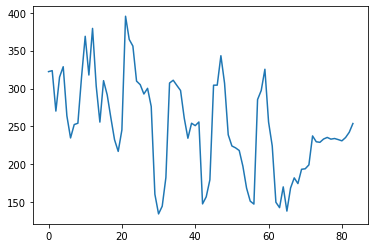

In [45]:

plt.plot(complete_pred)